Matplotlib Homework
Nimo Osman 
02 July 2019

In [247]:
 %matplotlib inline

#Importing Dependencies
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



In [248]:
#Data Path
city_data = os.path.join(r"C:\Users\Lenovo_7\Desktop\Resources\Matplotlib_Homework\city_data.csv")
ride_data = os.path.join(r"C:\Users\Lenovo_7\Desktop\Resources\Matplotlib_Homework\ride_data.csv")


In [249]:
#Reading Data
with open(ride_data, newline="") as csvfile:
    csvreader = csv.reader(csvfile, delimiter=",")
    csv_header = next(csvfile)
    print(f"Header: {csv_header}")


Header: city,date,fare,ride_id



In [250]:
# Combine the data into a single dataset

city_data_df = pd.read_csv(city_data)
ride_data_df = pd.read_csv(ride_data)
combined_data_df = pd.merge(city_data_df, ride_data_df, on='city')
# Display the data tables for preview
combined_data_df = combined_data_df.drop_duplicates("ride_id")



In [251]:
city_data_df.sort_values(by="driver_count", ascending=False).head(10)


,city,driver_count,type
25,West Samuelburgh,73,Urban
49,South Michelleport,72,Urban
5,West Anthony,70,Urban
30,Liumouth,69,Urban
15,Reynoldsfurt,67,Urban
2,Port Angela,67,Urban
38,East Kaylahaven,65,Urban
20,Jerryton,64,Urban
32,Royland,64,Urban
26,Grahamburgh,61,Urban


In [252]:
ride_data_df.sort_values(by="fare", ascending=False).head(10)


,city,date,fare,ride_id
2290,Randallchester,2/19/2018 3:52,58.55,8.004800e+12
2360,Jessicaport,1/31/2018 17:57,58.29,6.231550e+11
2262,Bradshawfurt,3/24/2018 18:53,57.51,2.302000e+12
2354,South Saramouth,4/12/2018 18:11,57.23,5.081200e+12
2330,Bradshawfurt,1/19/2018 20:21,56.78,1.253400e+12
2341,Michaelberg,3/10/2018 10:05,56.48,3.757070e+12
2374,Newtonview,4/25/2018 10:20,55.84,9.990580e+12
2267,South Marychester,2/21/2018 19:16,55.40,8.822360e+12
2294,Bradshawfurt,4/8/2018 13:46,55.19,1.742950e+12
2252,Michaelberg,3/27/2018 18:27,54.85,4.421840e+12


In [253]:
combined_data_df.sort_values(by="driver_count", ascending=False).drop_duplicates("city").head(10)

,city,driver_count,type,date,fare,ride_id
638,West Samuelburgh,73,Urban,2/22/2018 22:11,17.35,3.943010e+12
1211,South Michelleport,72,Urban,3/2/2018 9:54,33.12,8.138440e+11
125,West Anthony,70,Urban,1/23/2018 12:32,23.24,5.966010e+11
751,Liumouth,69,Urban,4/29/2018 6:57,23.99,8.194420e+11
57,Port Angela,67,Urban,4/22/2018 16:43,7.91,6.767310e+12
387,Reynoldsfurt,67,Urban,2/14/2018 11:25,39.40,9.070690e+12
940,East Kaylahaven,65,Urban,2/28/2018 16:46,33.72,1.224920e+12
782,Royland,64,Urban,4/19/2018 0:05,25.40,9.847760e+12
493,Jerryton,64,Urban,3/27/2018 12:48,13.29,8.959840e+12
666,Grahamburgh,61,Urban,4/10/2018 1:16,37.67,1.448870e+12


In [254]:
#Average Fare by city
average_fare = combined_data_df.groupby("city")["fare"].mean()
#Total Rides by city
total_rides = ride_data_df.groupby("city")["ride_id"].count()
#Total Drivers by city
total_drivers = city_data_df.groupby("city")["driver_count"].sum()
#City Type (Urban, Rural, Suburban)
city_types = city_data_df.set_index("city")["type"]
city_types.value_counts()


Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

In [255]:
#City Data Overview
city_data_summary = pd.DataFrame({
                "Average Fare per City":average_fare,
                "Total Rides": total_rides,
                "Number of Drivers": total_drivers,
                "City Types": city_types
})
city_data_summary.head(10)

,Average Fare per City,Total Rides,Number of Drivers,City Types
Amandaburgh,25.389412,18,12,Urban
Barajasview,25.332273,22,26,Urban
Barronchester,36.422500,16,11,Suburban
Bethanyland,32.956111,18,22,Suburban
Bradshawfurt,40.064000,10,7,Rural
Brandonfort,35.437368,19,10,Suburban
Carriemouth,28.314444,27,52,Urban
Christopherfurt,24.501852,27,41,Urban
Colemanland,30.894545,22,23,Suburban
Davidfurt,31.995882,17,23,Suburban


Ride Share Bubble Plot

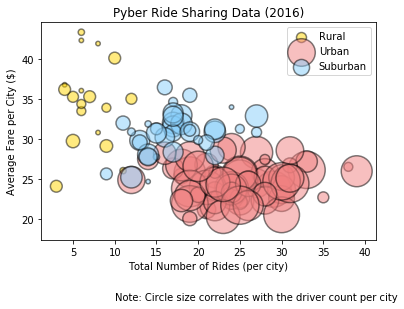

In [256]:
#City Types
rural = city_data_summary.loc[city_data_summary["City Types"]== "Rural"]
urban = city_data_summary.loc[city_data_summary["City Types"]== "Urban"]
suburban = city_data_summary.loc[city_data_summary["City Types"]== "Suburban"]

# Build the scatter plots for each city types
plt.scatter(rural["Total Rides"], rural["Average Fare per City"], color = "gold", edgecolors = "black", s = rural["Number of Drivers"]*20, label = "Rural", alpha = 0.5, linewidth=1.5)
plt.scatter(urban["Total Rides"], urban["Average Fare per City"], color = "lightcoral", edgecolors="black", s = urban["Number of Drivers"]*20, label = "Urban", alpha = 0.5, linewidth = 1.5)
plt.scatter(suburban["Total Rides"], suburban["Average Fare per City"], color = "lightskyblue", edgecolors ="black", s = suburban["Number of Drivers"]*20, label = "Suburban", alpha = 0.5, linewidth = 1.5)
# Create a legend
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (per city)")
plt.ylabel("Average Fare per City ($)")
plt.legend(loc="best")
# Incorporate a text label regarding circle size
plt.text(10, 10, "Note: Circle size correlates with the driver count per city")

# Save Figure
plt.savefig("RideShareBubblePlot.png")

#Plot
plt.show()

Total Fares by City Type

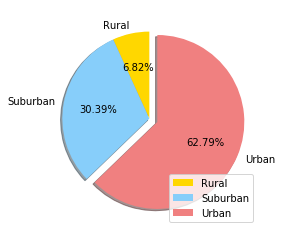

In [257]:
# Calculate Type
city_fares = combined_data_df.groupby("type")["fare"].sum()

# Build Pie Chart(with percents)
colors=["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1) 
plt.pie(city_fares, explode=explode, labels=city_fares.index, colors=colors, autopct="%1.2f%%", shadow=True, startangle=90)
plt.axis=("equal")
plt.legend(loc="lower right")


# Save Figure
plt.savefig("CityTypeFares.png")

#Show Plot
plt.show()

Total Rides by City Type

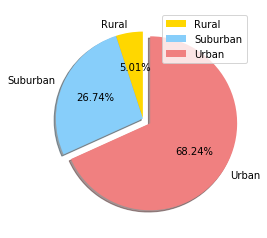

In [258]:
# Calculate Type
city_rides = combined_data_df.groupby("type")["ride_id"].sum()

# Build Pie Chart(with percents)
colors=["gold", "lightskyblue", "lightcoral"]
explode=(0,0,0.1)
plt.pie(city_rides, explode=explode, labels=city_rides.index, colors=colors, autopct="%1.2f%%", shadow=True, startangle=90)
plt.axis=("equal")
plt.legend(loc="upper right")


# Save Figure
plt.savefig("RidesbyCity.png")

#Show Plot
plt.show()

Total Drivers by City Type

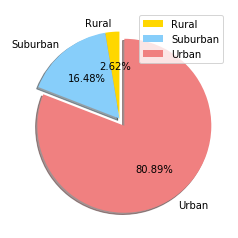

In [259]:
# Calculate Type
city_drivers = city_data_df.groupby("type")["driver_count"].sum()

# Build Pie Chart(with percents)
colors=["gold", "lightskyblue", "lightcoral"]
explode=(0,0,0.1)
plt.pie(city_drivers, explode=explode, labels=city_drivers.index, colors=colors, autopct="%1.2f%%", shadow=True, startangle=90)
plt.axis=("equal")
plt.legend(loc="best")

# Save Figure
plt.savefig("DriversbyCity.png")

#Show Plot
plt.show()